In [18]:
# Carregando as Bibliotecas necessárias.
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Importando o dataset de diabetes.
vinhos = datasets.load_wine()
vinhos

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
# Atribuindo os rótulos reais que irão classificar a qualidade do vinho.
vinhos["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
# Para organizar melhor os dados, vamos colocar o dataset dentro de uma tabela do pandas.
df = pd.DataFrame(data = vinhos["data"], columns = vinhos["feature_names"])

In [7]:
# Mostrando linhas x colunas da tabela do pandas.
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [31]:
# Dividindo o conjunto de dados orginal dois conjuntos: treinamento e teste.
vinho_simplificado = df[['alcohol', 'magnesium']]
x_treino, x_teste, y_treino, y_teste = train_test_split(vinho_simplificado, vinhos["target"], random_state = 0)

In [32]:
# Criando o classificador.
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_treino, y_treino)
KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
           metric_params = None, n_jobs = None, n_neighbors = 7, p = 2,
           weights = 'uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [33]:
knn.predict(x_teste.iloc[0:2])

array([0, 2])

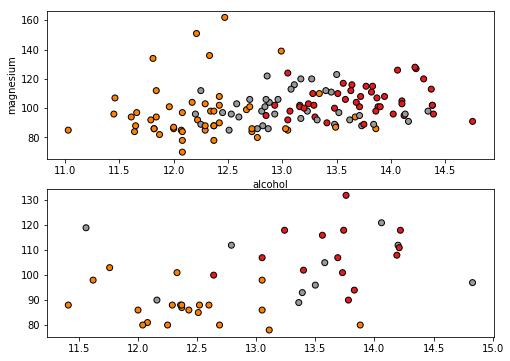

In [34]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.xlabel('alcohol')
plt.ylabel('magnesium')
plt.xticks(())
plt.yticks(())

x_max, y_max = x_teste.max()
x_min, y_min = x_teste.min()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.subplot(2, 1, 1)
plt.scatter(x_treino['alcohol'], x_treino['magnesium'], c=list(y_treino), cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('alcohol')
plt.ylabel('magnesium')

plt.subplot(2, 1, 2)
plt.scatter(x_teste['alcohol'], x_teste['magnesium'], c=knn.predict(x_teste), cmap=plt.cm.Set1, edgecolor='k')


plt.show()

In [35]:
knn.score(x_teste, y_teste)

0.6888888888888889